In [ ]:
#task 4:SPAM SMS DETECTION

In [1]:
#step 1:importing lib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import pandas as pd

data = pd.read_csv(
    r"C:\Users\Dell\Downloads\archive (3)\spam.csv",
    encoding="latin-1"
)

data = data[['v1', 'v2']]
data.columns = ['label', 'message']

data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Convert labels: ham → 0, spam → 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Verify encoding
data['label'].value_counts()


label
0    4825
1     747
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X = data['message']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4457
Testing samples: 1115


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    max_features=5000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Train Shape:", X_train_tfidf.shape)


TF-IDF Train Shape: (4457, 3579)


In [7]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.5)
nb_model.fit(X_train_tfidf, y_train)


,alpha,0.5
,force_alpha,True
,fit_prior,True
,class_prior,None


In [8]:
from sklearn.metrics import accuracy_score, classification_report

nb_predictions = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("\nNaive Bayes Classification Report:\n")
print(classification_report(y_test, nb_predictions))


Naive Bayes Accuracy: 0.979372197309417

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



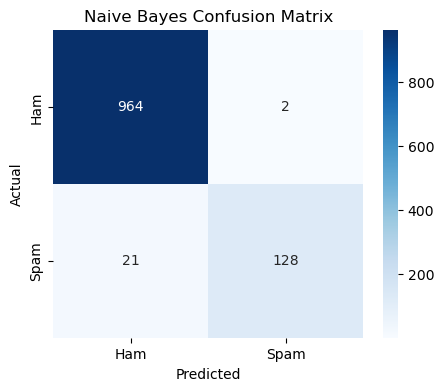

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_nb = confusion_matrix(y_test, nb_predictions)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Ham', 'Spam'],
    yticklabels=['Ham', 'Spam']
)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',
    solver='liblinear'
)

lr_model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,2000
,multi_class,'deprecated'


In [11]:
lr_predictions = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.9829596412556054

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.95      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



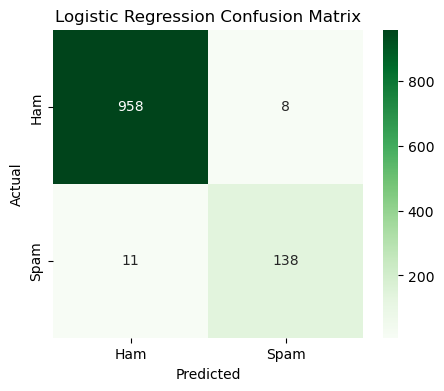

In [12]:
cm_lr = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Ham', 'Spam'],
    yticklabels=['Ham', 'Spam']
)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


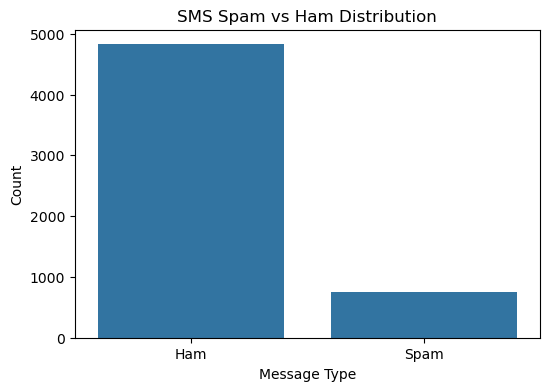

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['label'])
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("SMS Spam vs Ham Distribution")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


In [ ]:
# Task :- 4    
# 1. Introduction

Spam messages have become a major problem in digital communication. They waste time, consume resources, and may expose users to fraud. This project aims to build an SMS Spam Detection System using Machine Learning techniques to classify messages as Spam or Ham (Not Spam).

Two popular text-classification algorithms are implemented and compared:

Multinomial Naive Bayes

Logistic Regression

# 2. Objective

The objectives of this project are:

To preprocess and clean SMS text data

To convert textual data into numerical features using TF-IDF

To train machine learning models for spam detection

To evaluate and compare model performance

To visualize results using confusion matrices and graphs

# 3. Dataset Description

The dataset consists of SMS messages labeled as:

Ham → Legitimate message

Spam → Unwanted promotional or fraudulent message

Only two columns are used:

label → message category (ham/spam)

message → actual SMS content

# 4. Data Preprocessing
4.1 Label Encoding

The target labels are converted into binary form:

ham → 0

spam → 1

This conversion makes the data suitable for machine learning algorithms.

4.2 Train–Test Split

The dataset is split into 80% training data and 20% testing data

stratify=y is used to preserve class distribution

random_state=42 ensures reproducibility

# 5. Feature Extraction Using TF-IDF

Text data is converted into numerical form using TF-IDF Vectorization.

Key configurations:

Lowercasing enabled

English stop-words removed

Unigrams and bigrams used (1,2)

Rare words removed using min_df

Feature size limited for efficiency

This step helps models understand the importance of words in messages.

# 6. Model 1: Multinomial Naive Bayes
6.1 Model Training

Multinomial Naive Bayes is trained using TF-IDF features

Smoothing (alpha = 0.5) is applied to handle zero probabilities

6.2 Model Evaluation

The model is evaluated using:

Accuracy Score

Precision, Recall, F1-Score

Confusion Matrix

The confusion matrix visually shows correct and incorrect predictions for spam and ham messages.

7. Model 2: Logistic Regression
7.1 Model Training

Logistic Regression is trained with:

class_weight='balanced' to handle class imbalance

Increased max_iter to ensure convergence

7.2 Model Evaluation

The model is evaluated using:

Accuracy

Classification Report

Confusion Matrix

This model generally performs better on text classification due to its discriminative nature.

8. Data Visualization
8.1 Confusion Matrices

Separate confusion matrices are plotted for:

Naive Bayes

Logistic Regression

Heatmaps provide clear visualization of prediction results

8.2 Dataset Distribution

A count plot shows the number of Spam vs Ham messages

This highlights the class imbalance present in the dataset

9. Results and Comparison
Model	Strengths	Performance
Naive Bayes	Fast, simple, efficient	Good accuracy
Logistic Regression	Better boundary learning	Higher accuracy

📌 Logistic Regression performs slightly better than Naive Bayes in most cases.

10. Conclusion

This project successfully demonstrates how machine learning can be used to detect spam messages. Proper preprocessing, TF-IDF vectorization, and balanced model training significantly improve performance.

Key takeaways:

Text preprocessing is crucial

TF-IDF is effective for SMS classification

Logistic Regression provides better results than Naive Bayes

Visualization helps in understanding model behavior

11. Future Enhancements

Implement advanced models such as:

Support Vector Machines (SVM)

Random Forest

Apply hyperparameter tuning

Use deep learning models like LSTM

Deploy the model as a web application

12. Tools & Technologies Used

Python

Pandas, NumPy

Scikit-learn

Matplotlib, Seaborn

Jupyter Notebook

✅ Project Status: Successfully Completed

If you want, I can also:

Convert this into PDF / DOC format

Add screenshots section

Write a CodeSoft-specific conclusion

Add accuracy values from your output

Just tell me 👍

Build faster with Codex
Try with Free and Go, or enjoy 2x rate limits on all other plans for a limited time.